In [1]:
import numpy as np

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
digits.images.shape

(1797, 8, 8)

In [4]:
with open('mnist-y.data') as file:
    chars = [line[0] for line in file]

In [5]:
vectors = []
with open('mnist-x.data') as file:
    for line in file:
        vectors.append([1.0 if float(v) == 1 else -1.0 for v in line.strip().split(',')])

<Figure size 640x480 with 0 Axes>

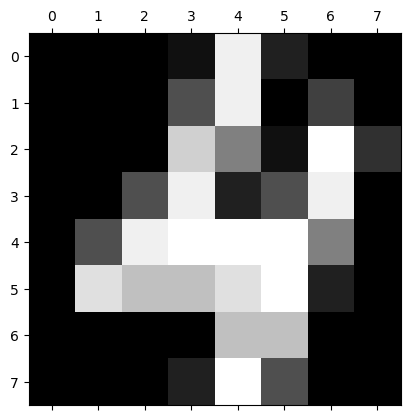

In [6]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[1001])
plt.show()

# KNN

In [7]:
digits['data'] = np.where(digits['data']>0,1,-1)

In [8]:
vectors = np.array(vectors)
vectors.shape

(6000, 784)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(vectors,chars,test_size=0.20, random_state=42)

In [10]:
X_train.shape

(4800, 784)

In [11]:
X_test.shape

(1200, 784)

In [12]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))



In [13]:
def predict(test_point):
    k=8
    distances = [euclidean_distance(test_point, x) for x in X_train]
    nearest_neighbors = np.argsort(distances)[:k]
    labels = [y_train[j] for j in nearest_neighbors]
    closest_class = max(set(labels), key=labels.count)
    return closest_class

In [14]:
def test():
    success = 0
    examples = X_test
    for e in range(len(examples)):
        z = predict(examples[e])
        if z == y_test[e]:
            success += 1
    return float(success) / len(examples)

In [15]:
tPoint=X_test[1]
predict(tPoint)

'2'

In [16]:
test()

0.9208333333333333

## Prostate

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

KNN on Prostate data

In [59]:
prostate_data = pd.read_csv('prostate.csv')
# X = prostate_data.iloc[:, :-1]
# y = prostate_data.iloc[:, -1]
numeric_cols = prostate_data.select_dtypes(include=['float', 'int']).columns
X = prostate_data[numeric_cols].iloc[:, :-1]
y = prostate_data[numeric_cols].iloc[:, -1]

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X.iloc[:, :-1], X.iloc[:, -1], test_size=0.3, random_state=42)

# scale the features
scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

#X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train.columns).reindex(X_train.columns, axis=1)

# define the euclidean_distance function
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

# define the predict function
def predict(test_point):
    k = 8
    distances = [euclidean_distance(test_point, x) for x in X_train]
    nearest_neighbors = np.argsort(distances)[:k]
    labels = [y_train[j] for j in nearest_neighbors]
    closest_class = max(set(labels), key=labels.count)
    return closest_class

In [55]:
print(X_train_scaled[1])
print(X_test_scaled[1])
print(" ")
print(X_train_scaled[1]-X_test_scaled[1])

[-1.03624382  0.90184112  0.04105504  1.15529998 -0.56011203 -0.46408842
 -1.30124168]
[-0.74211801 -1.24417801 -0.64661689 -1.09112463 -0.56011203 -0.87530334
  4.03650479]
 
[-0.29412581  2.14601913  0.68767193  2.24642461  0.          0.41121492
 -5.33774647]


In [53]:
def test():
    success = 0
    examples = test_X
    for e in range(len(examples)):
        z = predict(examples[e])
        if z == test_y[e]:
            success += 1
    return float(success) / len(examples)

In [61]:
test_point=X_test.iloc[1]
predict(test_point)

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('float64'), dtype('<U6')) -> None

Accuracy, training error, test error

# Perceptron

In [ ]:
data = [{'vector': v, 'char': c} for (v, c) in zip(vectors, chars)]

In [ ]:
def train(target_char, opposite_char, steps):
    train_data = data[:5000]
    train_data = [e for e in train_data if e['char'] in (target_char, opposite_char)]
    w = np.zeros(784)
    i = 0
    weights = w
    # Implement perceptron, remember:
    if z >= 0 and y == opposite_char:
        #TODO
    elif z < 0 and y == target_char:
        #TODO
    return w

def error(target_char, opposite_char,data,w):
    success = 0
    for e in data:
        z = np.dot(e['vector'], w)
        if (z >= 0 and e['char'] == target_char) or (z < 0 and e['char'] == opposite_char):
            success += 1
    return float(success) / len(data)

def test(target_char, opposite_char,weights):
    success = 0
    examples = data[5000:]

    examples = [e for e in examples if e['char'] in (target_char, opposite_char)]

    for e in examples:
        z = np.dot(e['vector'], weights)
        if (z >= 0 and e['char'] == target_char) or (z < 0 and e['char'] == opposite_char):
            success += 1

    return float(success) / len(examples)

In [ ]:
weights = train('1','2',100)

In [ ]:
test('1','2',weights)